# Описание проекта

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

# Инструкция по выполнению проекта

1. Загрузите и подготовьте данные. Поясните порядок действий.
2. Обучите и проверьте модель для каждого региона:
    
    - 2.1. Разбейте данные на обучающую и валидационную выборки в соотношении 75:25.
    - 2.2. Обучите модель и сделайте предсказания на валидационной выборке.
    - 2.3. Сохраните предсказания и правильные ответы на валидационной выборке.
    - 2.4. Напечатайте на экране средний запас предсказанного сырья и RMSE модели.
    - 2.5. Проанализируйте результаты.

3. Подготовьтесь к расчёту прибыли:
    
    - 3.1. Все ключевые значения для расчётов сохраните в отдельных переменных.
    - 3.2. Рассчитайте достаточный объём сырья для безубыточной разработки новой скважины. Сравните полученный объём сырья со средним запасом в каждом регионе.
    - 3.3. Напишите выводы по этапу подготовки расчёта прибыли.

4. Напишите функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели:

    - 4.1. Выберите скважины с максимальными значениями предсказаний.
    - 4.2. Просуммируйте целевое значение объёма сырья, соответствующее этим предсказаниям.
    - 4.3. Рассчитайте прибыль для полученного объёма сырья.

5. Посчитайте риски и прибыль для каждого региона:

    - 5.1. Примените технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли.
    - 5.2. Найдите среднюю прибыль, 95%-й доверительный интервал и риск убытков. Убыток — это отрицательная прибыль.
    - 5.3. Напишите выводы: предложите регион для разработки скважин и обоснуйте выбор.

# 1. Загрузка и подготовка данных

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import warnings

In [2]:
warnings.filterwarnings('ignore') 

In [3]:
geo_data0 = pd.read_csv("/datasets/geo_data_0.csv")
geo_data1 = pd.read_csv("/datasets/geo_data_1.csv")
geo_data2 = pd.read_csv("/datasets/geo_data_2.csv")

In [4]:
# Напишем функции, чтобы упростить нам работу, а также уменьшить кол-во строк

# Общая информация по регионам:
def geo_info(data):
    data.info()
    display(data.head(5))
    print(f'Кол-во дубликатов: {data.duplicated().sum()}')
    print()
    print(f'Кол-во пропусков: {data.isnull().sum()}')


# Разделение на обучающую и валидационную выборки:
def split_data(data):
    data_train, data_valid = train_test_split(data, test_size=.25, random_state=12345)
    data_train = data_train.reset_index(drop=True)
    data_valid = data_valid.reset_index(drop=True)
    return data_train, data_valid

In [5]:
geo_info(geo_data0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


Кол-во дубликатов: 0

Кол-во пропусков: id         0
f0         0
f1         0
f2         0
product    0
dtype: int64


In [6]:
geo_info(geo_data1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


Кол-во дубликатов: 0

Кол-во пропусков: id         0
f0         0
f1         0
f2         0
product    0
dtype: int64


In [7]:
geo_info(geo_data2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


Кол-во дубликатов: 0

Кол-во пропусков: id         0
f0         0
f1         0
f2         0
product    0
dtype: int64


*Можно избавиться от столбца "id", так как в дальнейшем при обучении модели данный столбец может полвиять на расчет*

In [8]:
geo_data0 = geo_data0.drop(["id"], axis=1)
geo_data1 = geo_data1.drop(["id"], axis=1)
geo_data2 = geo_data2.drop(["id"], axis=1)

### Графики распределения

region 1


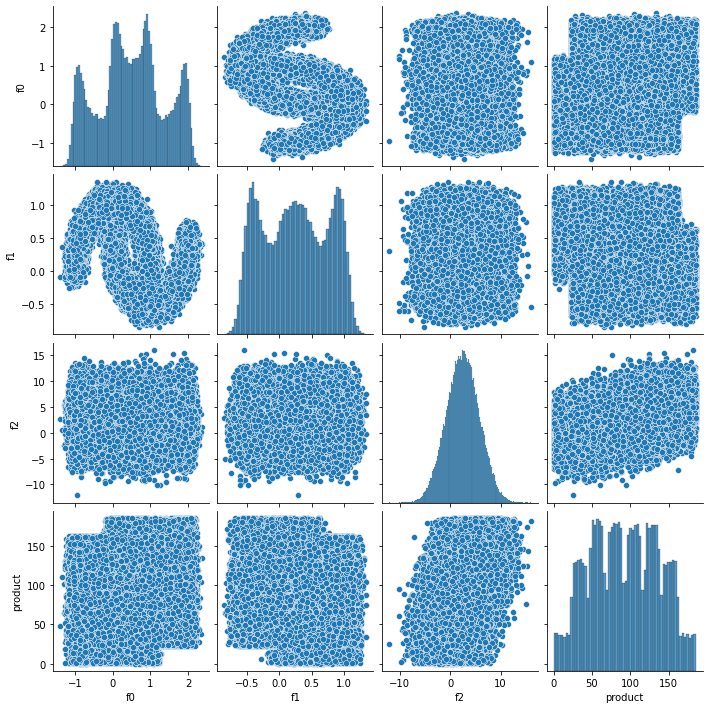


region 2


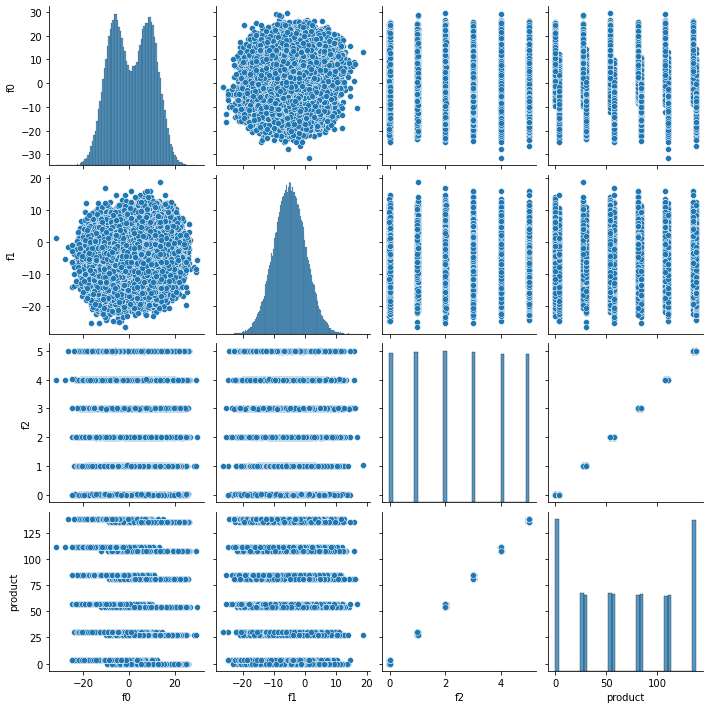


region 3


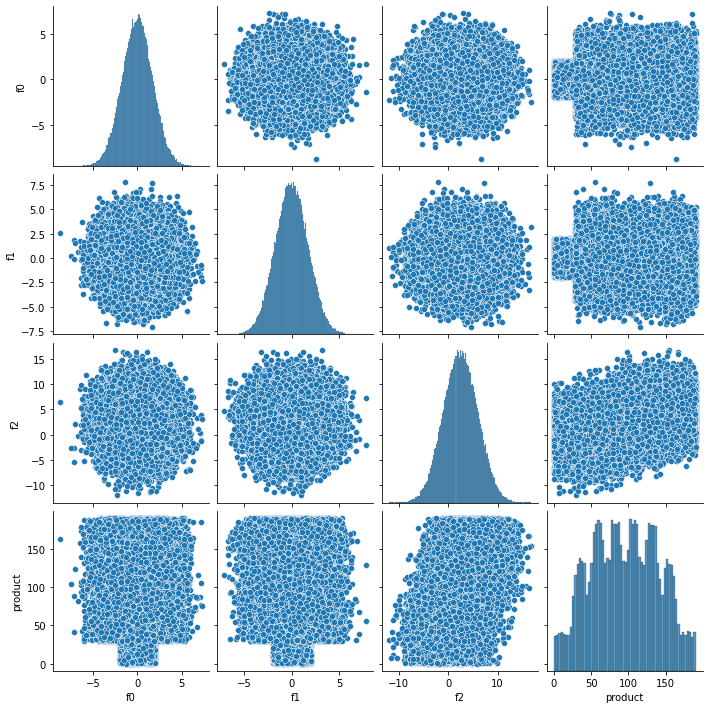

In [9]:
j = 1
for i in geo_data0, geo_data1, geo_data2:
    print('region ' + str(j))
    sns.pairplot(i)
    plt.show()
    j += 1
    print()

*Интересная картина, у региона 2 можно заметить линейную зависимость 2 признаков: product и f2*

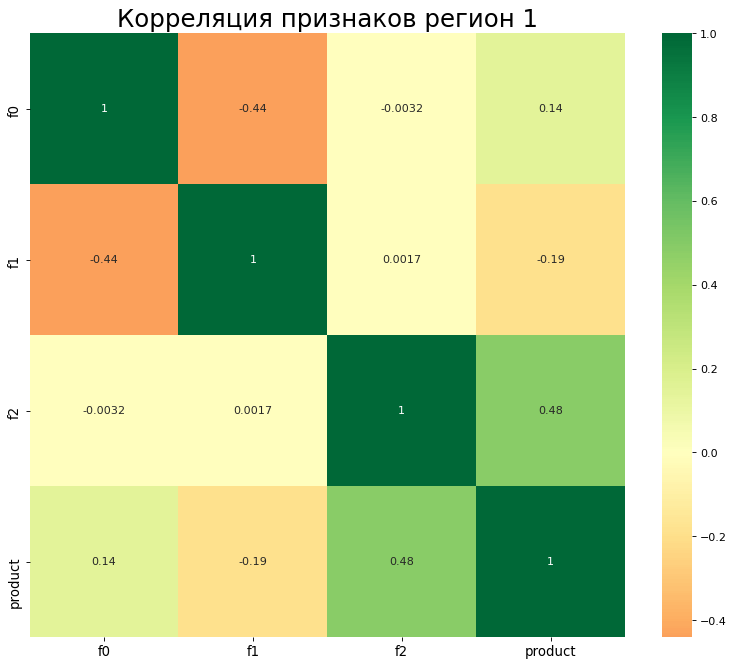

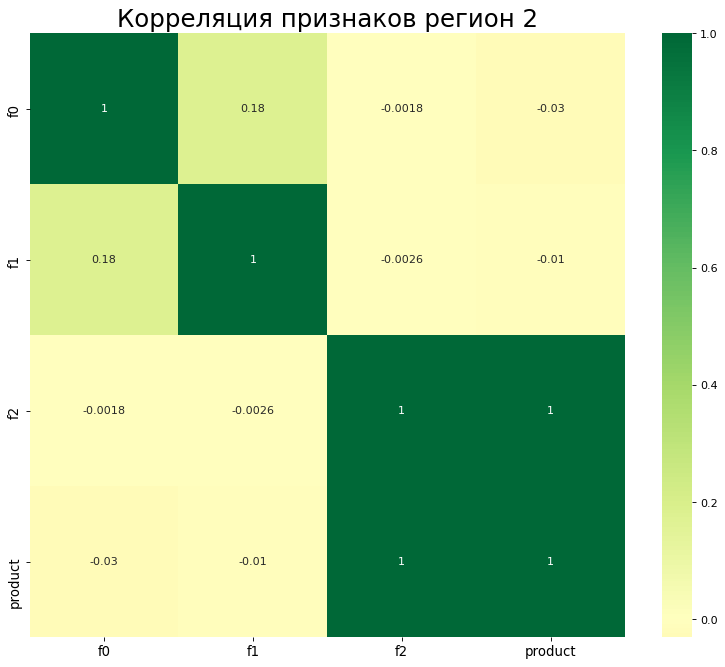

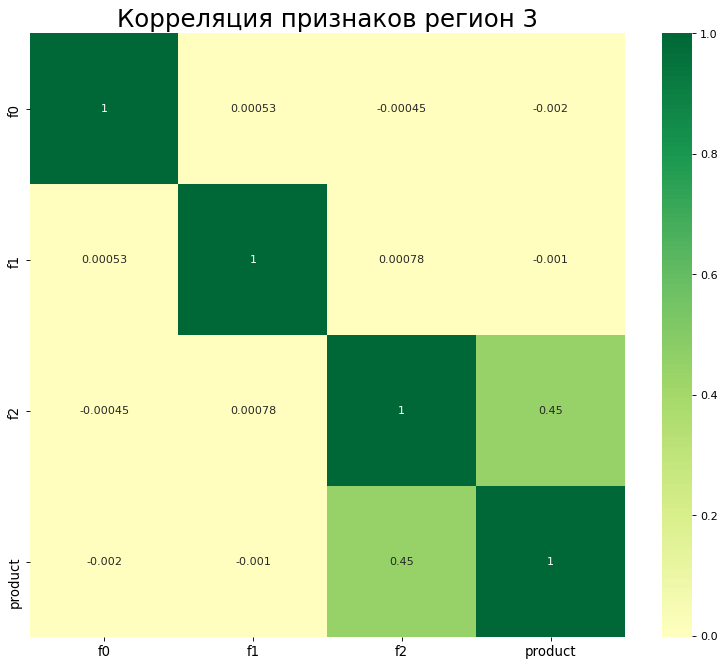

In [10]:
j = 1
for i in geo_data0, geo_data1, geo_data2:
    i.name = f'регион {str(j)}'
    j+=1
    # Plot
    plt.figure(figsize=(12,10), dpi= 80)
    sns.heatmap(i.corr(), xticklabels=i.corr().columns, yticklabels=i.corr().columns, cmap='RdYlGn', center=0, annot=True)

    # Decorations
    plt.title(f'Корреляция признаков {i.name}', fontsize=22)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

## Вывод

*Общий взгляд на датасеты был проведен*

*Избавились от столбца "id" в каждом датасете*

*Написали вспомогательные функции для упрощения работы*

# 2. Обучение и проверка модели

### Разделим данные на обучающую и валидационную выборки

In [11]:
geo_data0_train, geo_data0_valid = split_data(geo_data0)
geo_data1_train, geo_data1_valid = split_data(geo_data1)
geo_data2_train, geo_data2_valid = split_data(geo_data2)

### Обучение модели и вывод результатов

Попробуем помимо линейной, также другие модели

### Подготовим модели и посмотрим на результаты RMSE и R2 метрик:

In [12]:
def lin_reg(data_train, data_valid):
    
    # разобьем данные обучающей выборки:
    features_train = data_train.drop(['product'], axis = 1)
    target_train = data_train['product']
    
    # разобьем данные тестовой выборки:
    features_valid = data_valid.drop(['product'], axis = 1)
    target_valid = data_valid['product']
    
    # обучим модель:
    model = LinearRegression()
    model.fit(features_train, target_train)
    predictions = model.predict(features_valid)
    predictions = pd.Series(predictions)
    mse = mean_squared_error(target_valid, predictions)
    rmse = mse**0.5
    mean = target_valid.mean()
    print(f'Cредний запас сырья: {mean:.2f}')
    print(f'Cредний запас сырья (Предсказываемый): {predictions.mean():.2f}')
    print(f'RMSE: {rmse:.2f}')
    print(f'R2: {r2_score(target_valid, predictions):.2f}')
    return predictions, target_valid

In [13]:
def mlp_reg(data_train, data_valid):
    
    # разобьем данные обучающей выборки:
    features_train = data_train.drop(['product'], axis = 1)
    target_train = data_train['product']
    
    # разобьем данные тестовой выборки:
    features_valid = data_valid.drop(['product'], axis = 1)
    target_valid = data_valid['product']
    
    # обучим модель:
    model = MLPRegressor()
    model.fit(features_train, target_train)
    predictions = model.predict(features_valid)
    predictions = pd.Series(predictions)
    mse = mean_squared_error(target_valid, predictions)
    rmse = mse**0.5
    mean = target_valid.mean()
    print(f'Cредний запас сырья: {mean:.2f}')
    print(f'Cредний запас сырья (Предсказываемый): {predictions.mean():.2f}')
    print(f'RMSE: {rmse:.2f}')
    print(f'R2: {r2_score(target_valid, predictions):.2f}')
    return predictions, target_valid

In [14]:
def rf_reg(data_train, data_valid):
    
    # разобьем данные обучающей выборки:
    features_train = data_train.drop(['product'], axis = 1)
    target_train = data_train['product']
    
    # разобьем данные тестовой выборки:
    features_valid = data_valid.drop(['product'], axis = 1)
    target_valid = data_valid['product']
    
    # обучим модель:
    model = RandomForestRegressor(n_jobs=(-1), max_depth=6, n_estimators=300)
    model.fit(features_train, target_train)
    predictions = model.predict(features_valid)
    predictions = pd.Series(predictions)
    mse = mean_squared_error(target_valid, predictions)
    rmse = mse**0.5
    mean = target_valid.mean()
    print(f'Cредний запас сырья: {mean:.2f}')
    print(f'Cредний запас сырья (Предсказываемый): {predictions.mean():.2f}')
    print(f'RMSE: {rmse:.2f}')
    print(f'R2: {r2_score(target_valid, predictions):.2f}')
    return predictions, target_valid

#### 1-ый регион

In [15]:
predicted_0, target_valid_0 = lin_reg(geo_data0_train, geo_data0_valid)

Cредний запас сырья: 92.08
Cредний запас сырья (Предсказываемый): 92.59
RMSE: 37.58
R2: 0.28


In [16]:
predicted_0_mlp, target_valid_0_mlp = mlp_reg(geo_data0_train, geo_data0_valid)

Cредний запас сырья: 92.08
Cредний запас сырья (Предсказываемый): 91.91
RMSE: 37.04
R2: 0.30


In [17]:
predicted_0_rf, target_valid_0_rf = rf_reg(geo_data0_train, geo_data0_valid)

Cредний запас сырья: 92.08
Cредний запас сырья (Предсказываемый): 92.60
RMSE: 37.38
R2: 0.29


*R2 равна 0.28, модель явно не идеальна, но он предсказывает объем больше среднего. RMSE всего лишь составляет 2.5 от среднего запаса сырья по региону. Столь высокая ошибка влечет за собой как правило увеличение рисков, однако высокий риск от части компенсируется высоким средним запасом сырья на одной скважине*

#### 2-ой регион

In [18]:
predicted_1, target_valid_1 = lin_reg(geo_data1_train, geo_data1_valid)

Cредний запас сырья: 68.72
Cредний запас сырья (Предсказываемый): 68.73
RMSE: 0.89
R2: 1.00


In [19]:
predicted_1_mlp, target_valid_1_mlp = mlp_reg(geo_data1_train, geo_data1_valid)

Cредний запас сырья: 68.72
Cредний запас сырья (Предсказываемый): 68.74
RMSE: 0.73
R2: 1.00


In [20]:
predicted_1_rf, target_valid_1_rf = rf_reg(geo_data1_train, geo_data1_valid)

Cредний запас сырья: 68.72
Cредний запас сырья (Предсказываемый): 68.73
RMSE: 0.72
R2: 1.00


*Значение метрики R2 равно единице только в одном случае, если MSE нулевое. Как мы видим RMSE - корень из MSE близок к нулю. Можно сделать вывод о том, что полученная модель по данному региону предсказывает объем нефти на скважине идеально. Средний запас сырья в данном регионе составляет 69 тыс. баррелей на одну скважину*

#### 3-ий регион

In [21]:
predicted_2, target_valid_2 = lin_reg(geo_data2_train, geo_data2_valid)

Cредний запас сырья: 94.88
Cредний запас сырья (Предсказываемый): 94.97
RMSE: 40.03
R2: 0.21


In [22]:
predicted_2_mlp, target_valid_2_mlp = mlp_reg(geo_data2_train, geo_data2_valid)

Cредний запас сырья: 94.88
Cредний запас сырья (Предсказываемый): 94.82
RMSE: 37.85
R2: 0.29


In [23]:
predicted_2_rf, target_valid_2_rf = rf_reg(geo_data2_train, geo_data2_valid)

Cредний запас сырья: 94.88
Cредний запас сырья (Предсказываемый): 95.02
RMSE: 37.98
R2: 0.28


*В моделе по последнему региону ситуция схожа с той, с которой мы наблюдали в модели первого региона. Модель предсказывает лучше среднего значения, однако ей далеко до идельной. Не смотря на самую высокую среди 3-х моделей ошибку в 40 тыс. баррелей на одну скважину, регион обладает самым высоким средним запасом сырья на скважину.*

## Вывод

*Мы обучили модели линейной регрессии для 3-х регионов. Регион - 2 оказался худшим по среднему запасу сырья на скважину, но модель построенная для данного региона идально предсказывает объем сырья на скажине. Регионы 1 и 3 являются самыми рисковыми, так как их модели обладают большими RMSE, но также и самыми богатыми, так как средний запас сырья на скажине превышает значение в 90 баррелей*

# 3. Подготовка к расчёту прибыли

### Сохраним известные значения в переменные

In [24]:
research_areas = 500
areas_limit = 200
total_budget = 10 ** 10
cost_for_well = total_budget // areas_limit
barrel_profit = 450
barrel_revenue = 450 * (10**3)

*Посчитаем необходимый минимальный объём сырья с одной скважины, который окупит эту скважину*

In [25]:
payback_in_bulk = cost_for_well / barrel_revenue
print(f"Объем необходимый для окупаемости региона равен: {payback_in_bulk:.2f} тыс. баррелей")

Объем необходимый для окупаемости региона равен: 111.11 тыс. баррелей


*Для того, чтобы окупить бурение 1 скважины необходимо с нее добыть не менее 111.11 тыс. баррелей. Посчитаем минимальный средний объём сырья в месторождениях региона, достаточный для его разработки.*

In [26]:
min_product_region = total_budget/barrel_profit/1000
print(f'Минимальный объем для окупаемости региона равен {min_product_region:.2f} тыс. баррелей')

Минимальный объем для окупаемости региона равен 22222.22 тыс. баррелей


*Для того, чтобы окупить разработку месторождений в конкретном регионе, необходимо добыть из них не менее 2222.22 тыс. баррелей нефти.*

In [27]:
# Напишем функцию для расчёта прибыли по набору отобранных месторождений и предсказаний модели.
def profit(target, probabilities, count):
    probs_sorted = probabilities.sort_values(ascending=False)
    selected = target[probs_sorted.index][:count]
    result = barrel_profit * selected.sum()*1000 - cost_for_well*count
    return result

## Вывод

*22 222.22 тыс. баррелей нефти - минимальный объем, который необходимо добыть в регионе, для того, чтобы окупить разработку месторождений. При этом на имеющийся бюджет мы можем разработать не более 200 месторождений в регионе. Для расчета прибыли по набору отобранных месторождений и предсказаний модели была написана функция*

# 4. Расчёт прибыли и рисков 

In [28]:
# Напишем функцию для bootstrap
def bootstrap(target, probabilities):
    
    state = np.random.RandomState(12345)
   
    values = []
    for i in range(1000):
        target_subsample = target.sample(n=research_areas, replace=True, random_state=state)
        probs_subsample = probabilities[target_subsample.index]
        values.append(profit(target_subsample, probs_subsample, areas_limit))
    values = pd.Series(values)
    
    mean = values.mean()
    
    lower = values.quantile(0.025)
    upper = values.quantile(0.975)
    
    loss_count = values.where(values < 0).count()
    risk_of_loss = loss_count / values.count()
    print(f"Риск убытков: {risk_of_loss:.2%}")
    print(f"Средняя прибыль: {mean/(10**9):.2f} млрд.")
    print(f"2.5%-квантиль: {lower/(10**9):.2f} млрд.")
    print(f"97.5%-квантиль: {upper/(10**9):.2f} млрд.")

#### 1-ый регион

In [29]:
bootstrap(target_valid_0, predicted_0)

Риск убытков: 6.00%
Средняя прибыль: 0.43 млрд.
2.5%-квантиль: -0.10 млрд.
97.5%-квантиль: 0.95 млрд.


In [30]:
bootstrap(target_valid_0_mlp, predicted_0_mlp)

Риск убытков: 3.10%
Средняя прибыль: 0.52 млрд.
2.5%-квантиль: -0.02 млрд.
97.5%-квантиль: 1.01 млрд.


In [31]:
bootstrap(target_valid_0_rf, predicted_0_rf)

Риск убытков: 4.70%
Средняя прибыль: 0.47 млрд.
2.5%-квантиль: -0.08 млрд.
97.5%-квантиль: 0.97 млрд.


#### 2-ой регион

In [32]:
bootstrap(target_valid_1, predicted_1)

Риск убытков: 1.00%
Средняя прибыль: 0.52 млрд.
2.5%-квантиль: 0.07 млрд.
97.5%-квантиль: 0.93 млрд.


In [33]:
bootstrap(target_valid_1_mlp, predicted_1_mlp)

Риск убытков: 1.00%
Средняя прибыль: 0.52 млрд.
2.5%-квантиль: 0.07 млрд.
97.5%-квантиль: 0.93 млрд.


In [34]:
bootstrap(target_valid_1_rf, predicted_1_rf)

Риск убытков: 1.00%
Средняя прибыль: 0.52 млрд.
2.5%-квантиль: 0.07 млрд.
97.5%-квантиль: 0.93 млрд.


#### 3-ий регион

In [35]:
bootstrap(target_valid_2, predicted_2)

Риск убытков: 6.40%
Средняя прибыль: 0.44 млрд.
2.5%-квантиль: -0.13 млрд.
97.5%-квантиль: 0.97 млрд.


In [36]:
bootstrap(target_valid_2_mlp, predicted_2_mlp)

Риск убытков: 0.30%
Средняя прибыль: 0.73 млрд.
2.5%-квантиль: 0.19 млрд.
97.5%-квантиль: 1.28 млрд.


In [37]:
bootstrap(target_valid_2_rf, predicted_2_rf)

Риск убытков: 0.50%
Средняя прибыль: 0.70 млрд.
2.5%-квантиль: 0.14 млрд.
97.5%-квантиль: 1.22 млрд.


## Вывод

*Мы применили технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли. В результате анализа мы пришли к выводу о том, что наименее рисковым и выгодным для нас является 2 регион.*

*Можно применить ensemble learning, чтобы выявить, какой регион является выгодным*

*Проверим 3 модели, можно сделать вывод, что самым выгодным регионом является - 3-ий регион*

# Общий вывод

*В результате мы видим, что во всех 3-х регионах присутствует риск убытков. Самый минимальный риск показал 3-ой регион. Проанализировав доверительные интервалы, мы можем сделать вывод о то, что наиболее выгодным является для нас разработка месторождений во 2 регионе. Помимо того, что в доверительный интервал попадают значения с большей прибылью, так и обученная нами модель представляет собой идеальную модель предсказания. С большой долей уверенности можно сказать, что в этом регионе мы получим максимально возможную и предсказуемую прибыль и соответственно понесем меньше сопутствующих рисков.*